In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr as pearr

import torch
import torch.utils as utils
from torchvision import datasets, transforms

In [2]:
dataset_name = 'train_data9'
train_set = datasets.ImageFolder(root='dataset/preproced_data/%s/'%dataset_name,
                       transform=transforms.Compose([
#                              transforms.RandomHorizontalFlip(p=0.5),
##                             transforms.RandomVerticalFlip(p=0.5),
##                             transforms.RandomRotation(90),
                         transforms.Grayscale(),
                         transforms.Resize((64,64)),
                         transforms.ToTensor(),
                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
train_loader = utils.data.DataLoader(dataset=train_set, batch_size=1000,shuffle=True)

for idx, (data, target) in enumerate(train_loader):
    x_train = data.cpu().numpy()

score_num = 1
dir_name = ['abnormal', 'normal']
test_set = datasets.ImageFolder(root='dataset/dongdong2/%s/'%dir_name[score_num],
                           transform=transforms.Compose([
#                              transforms.RandomHorizontalFlip(p=0.5),
                             transforms.Grayscale(),
                             transforms.Resize((64,64)),
                             transforms.ToTensor(),
                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
test_loader = utils.data.DataLoader(dataset=test_set,batch_size=100,shuffle=False)

for idx, (data, target) in enumerate(test_loader):
    x_test = data.cpu().numpy()
    
score_num = 0    
test_set = datasets.ImageFolder(root='dataset/dongdong2/%s/'%dir_name[score_num],
                           transform=transforms.Compose([
#                              transforms.RandomHorizontalFlip(p=0.5),
                             transforms.Grayscale(),
                             transforms.Resize((64,64)),
                             transforms.ToTensor(),
                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
test_loader = utils.data.DataLoader(dataset=test_set,batch_size=100,shuffle=False)

for idx, (data, target) in enumerate(test_loader):
    x_out = data.cpu().numpy()

x_train = np.reshape(x_train, (len(x_train),-1))
x_test = np.reshape(x_test, (len(x_test), -1))
x_out = np.reshape(x_out, (len(x_out),-1))
print(np.shape(x_train), np.shape(x_test), np.shape(x_out))

(631, 4096) (25, 4096) (31, 4096)


(25,) (31,)
(25,) (31,)


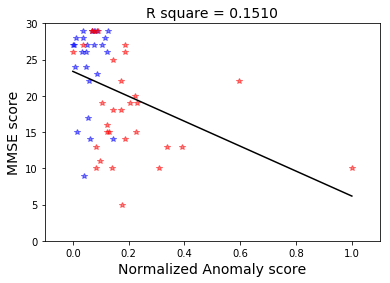

(25,) (31,)
(25,) (31,)


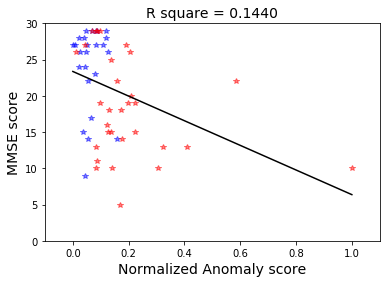

(25,) (31,)
(25,) (31,)


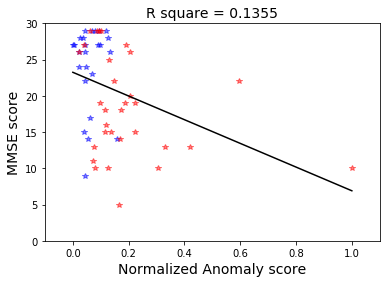

(25,) (31,)
(25,) (31,)


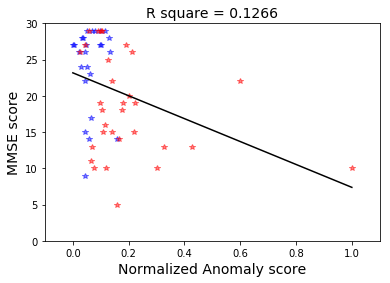

(25,) (31,)
(25,) (31,)


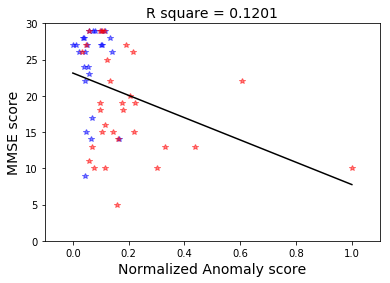

(25,) (31,)
(25,) (31,)


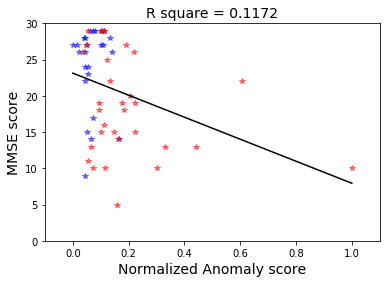

(25,) (31,)
(25,) (31,)


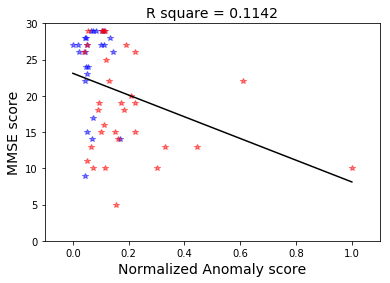

(25,) (31,)
(25,) (31,)


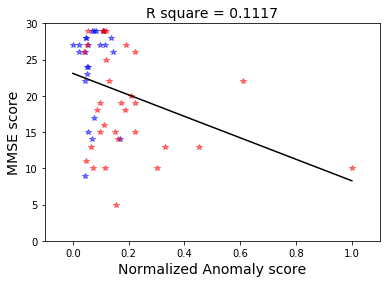

(25,) (31,)
(25,) (31,)


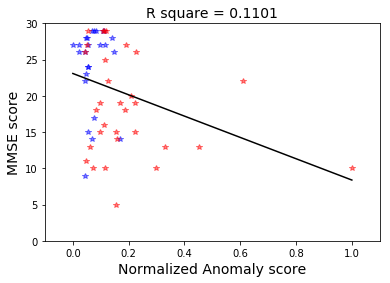

(25,) (31,)
(25,) (31,)


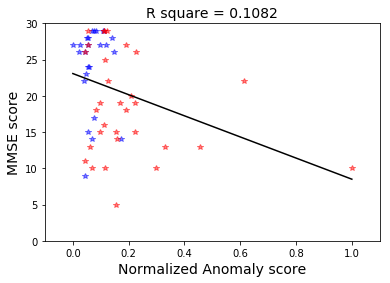

(25,) (31,)
(25,) (31,)


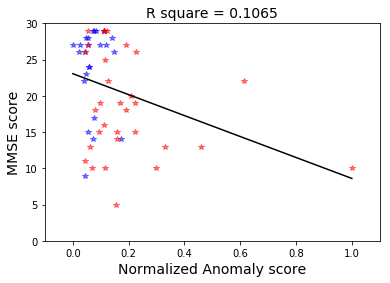

(25,) (31,)
(25,) (31,)


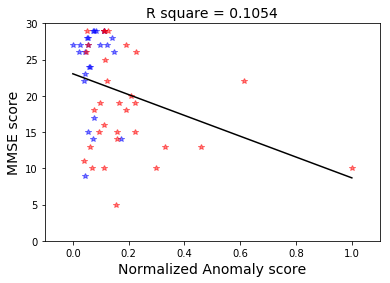

(25,) (31,)
(25,) (31,)


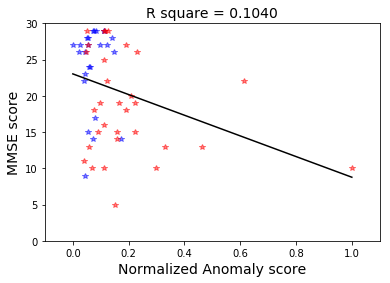

(25,) (31,)
(25,) (31,)


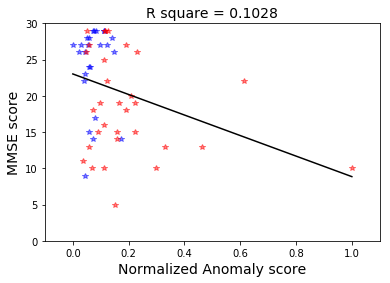

(25,) (31,)
(25,) (31,)


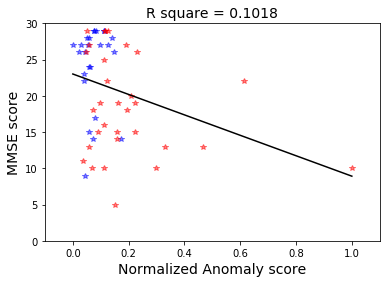

(25,) (31,)
(25,) (31,)


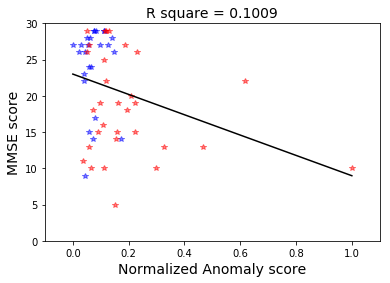

(25,) (31,)
(25,) (31,)


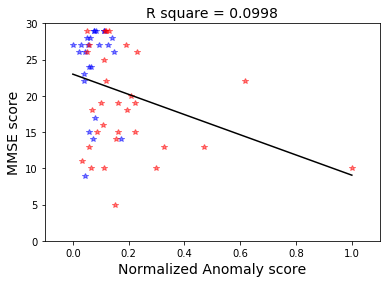

(25,) (31,)
(25,) (31,)


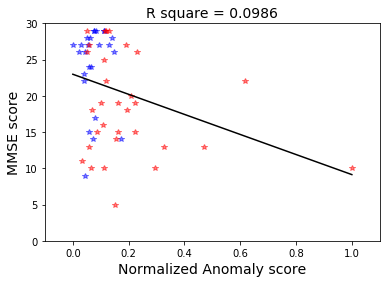

(25,) (31,)
(25,) (31,)


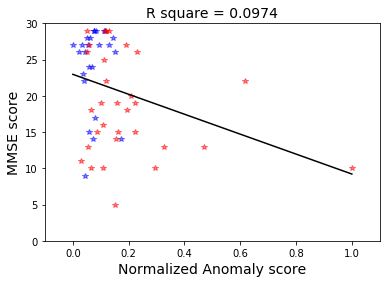

(25,) (31,)
(25,) (31,)


/opt/anaconda3/envs/khj/lib/python3.7/site-packages/sklearn/svm/classes.py:1211: RuntimeWarning: invalid value encountered in add
  return self.decision_function(X) + self.offset_
/opt/anaconda3/envs/khj/lib/python3.7/site-packages/sklearn/svm/classes.py:1211: RuntimeWarning: invalid value encountered in add
  return self.decision_function(X) + self.offset_
/opt/anaconda3/envs/khj/lib/python3.7/site-packages/sklearn/svm/classes.py:1211: RuntimeWarning: invalid value encountered in add
  return self.decision_function(X) + self.offset_
/opt/anaconda3/envs/khj/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

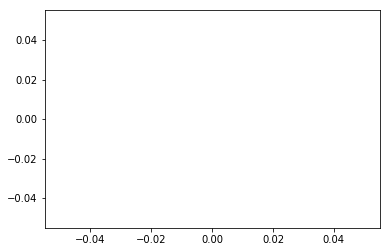

In [6]:
def cal_AUC(sensitivity, specificity):
    wid = (1-specificity)[:-1]-(1-specificity)[1:]
    auc = np.sum(sensitivity[1:]*wid)
    return auc

fpr_list = []
tpr_list = []
for k in range(1,21):
    clf = svm.OneClassSVM(nu=0.05*k, kernel='rbf', gamma='auto')
    clf.fit(x_train)
    y_pred_train = clf.score_samples(x_train)
    y_pred_test = clf.score_samples(x_test)
    y_pred_out = clf.score_samples(x_out)
    print(np.shape(y_pred_test), np.shape(y_pred_out))
    
    nm_mmse = np.loadtxt('dataset/dongdong/normal/normal_1/MMSE_1.txt')
    ab_mmse = np.loadtxt('dataset/dongdong/abnormal/abnormal_0/MMSE_0.txt')
    print(np.shape(nm_mmse), np.shape(ab_mmse))

    mmse_list = np.append(nm_mmse, ab_mmse)
    score_list = np.append(y_pred_test, y_pred_out)
    score_list = 1-((score_list - np.min(score_list))/(np.max(score_list)-np.min(score_list)))

    plt.plot(score_list[:25], mmse_list[:25], 'b*', alpha=0.5)
    plt.plot(score_list[25:], mmse_list[25:], 'r*', alpha=0.5)

    line_fitter = LinearRegression()
    line_fitter.fit(score_list.reshape(-1,1), mmse_list)
    R_, _ = pearr(score_list, mmse_list)
    rsqr = R_**2

    a = np.min(score_list)
    b = np.max(score_list)
    plt.plot([a,b], line_fitter.predict(np.reshape([a,b],(-1,1))), 'k')
    plt.xlabel('Normalized Anomaly score', fontsize=14)
    plt.ylabel('MMSE score', fontsize=14)
    plt.ylim(0,30)
    plt.xlim(-0.1,1.1)
    plt.title('R square = %.4f'%rsqr, fontsize=14)
    plt.savefig('mmse_img/mmse_plot_%.2f.png'%(k*0.05))
    plt.show()